# 第 11 章第 1 节-聚类、成本函数计算（轮廓系数）

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [13]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

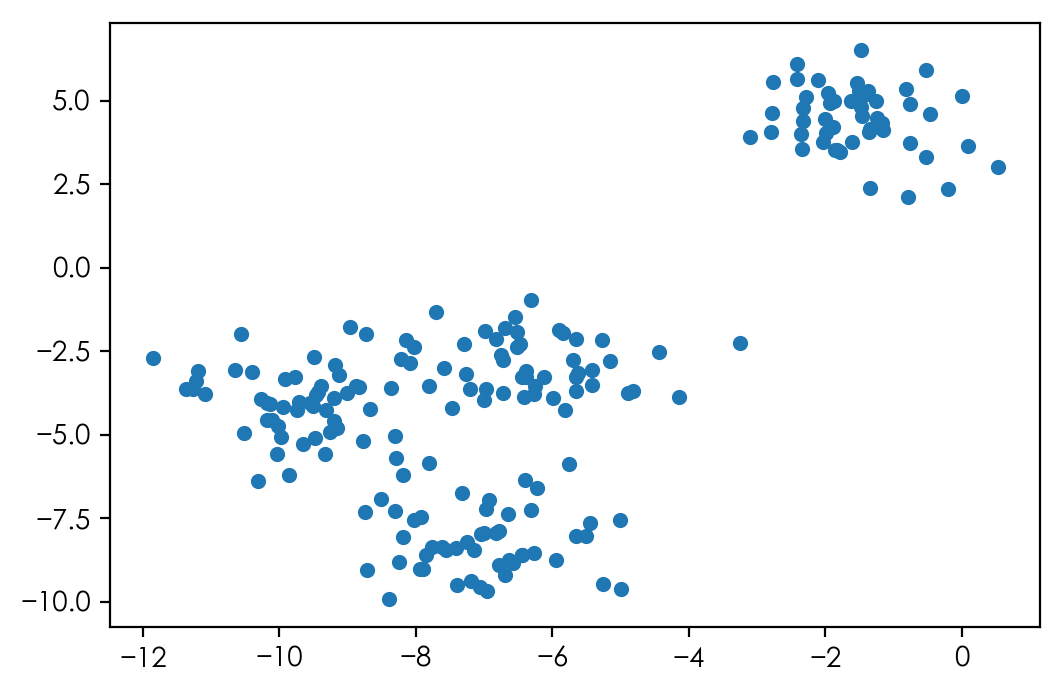

In [14]:
plt.figure(figsize=(6,4), dpi=100)
#plt.xticks(())
#plt.yticks(())
plt.scatter(X[:, 0], X[:, 1], s=20, marker='o');

In [4]:
from sklearn.cluster import KMeans

n_clusters = 3
kmean = KMeans(n_clusters=n_clusters)
kmean.fit(X);
print("kmean: k={}, cost={}".format(n_clusters, int(kmean.score(X))))

kmean: k=3, cost=-668


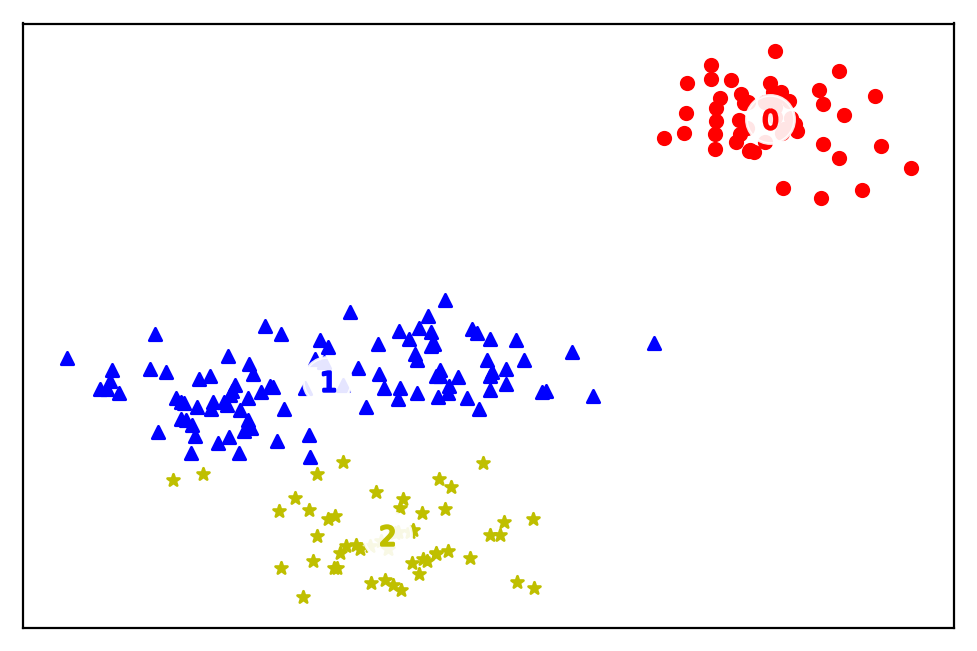

In [5]:
labels = kmean.labels_
centers = kmean.cluster_centers_
markers = ['o', '^', '*']
colors = ['r', 'b', 'y']

plt.figure(figsize=(6,4), dpi=100)
plt.xticks(())
plt.yticks(())

# 画样本
for c in range(n_clusters):
    cluster = X[labels == c]
    plt.scatter(cluster[:, 0], cluster[:, 1], 
                marker=markers[c], s=20, c=colors[c])
# 画出中心点
plt.scatter(centers[:, 0], centers[:, 1],
            marker='o', c="white", alpha=0.9, s=300)
for i, c in enumerate(centers):
    plt.scatter(c[0], c[1], marker='$%d$' % i, s=50, c=colors[i])

In [6]:
def fit_plot_kmean_model(n_clusters, X):
    plt.xticks(())
    plt.yticks(())

    # 使用 k-均值算法进行拟合
    kmean = KMeans(n_clusters=n_clusters)
    kmean.fit_predict(X)

    labels = kmean.labels_
    centers = kmean.cluster_centers_
    markers = ['o', '^', '*', 's']
    colors = ['r', 'b', 'y', 'k']

    # 计算成本
    score = kmean.score(X)
    plt.title("k={}, score={}".format(n_clusters, (int)(score)))

    # 画样本
    for c in range(n_clusters):
        cluster = X[labels == c]
        plt.scatter(cluster[:, 0], cluster[:, 1], 
                    marker=markers[c], s=20, c=colors[c])
    # 画出中心点
    plt.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=0.9, s=300)
    for i, c in enumerate(centers):
        plt.scatter(c[0], c[1], marker='$%d$' % i, s=50, c=colors[i])

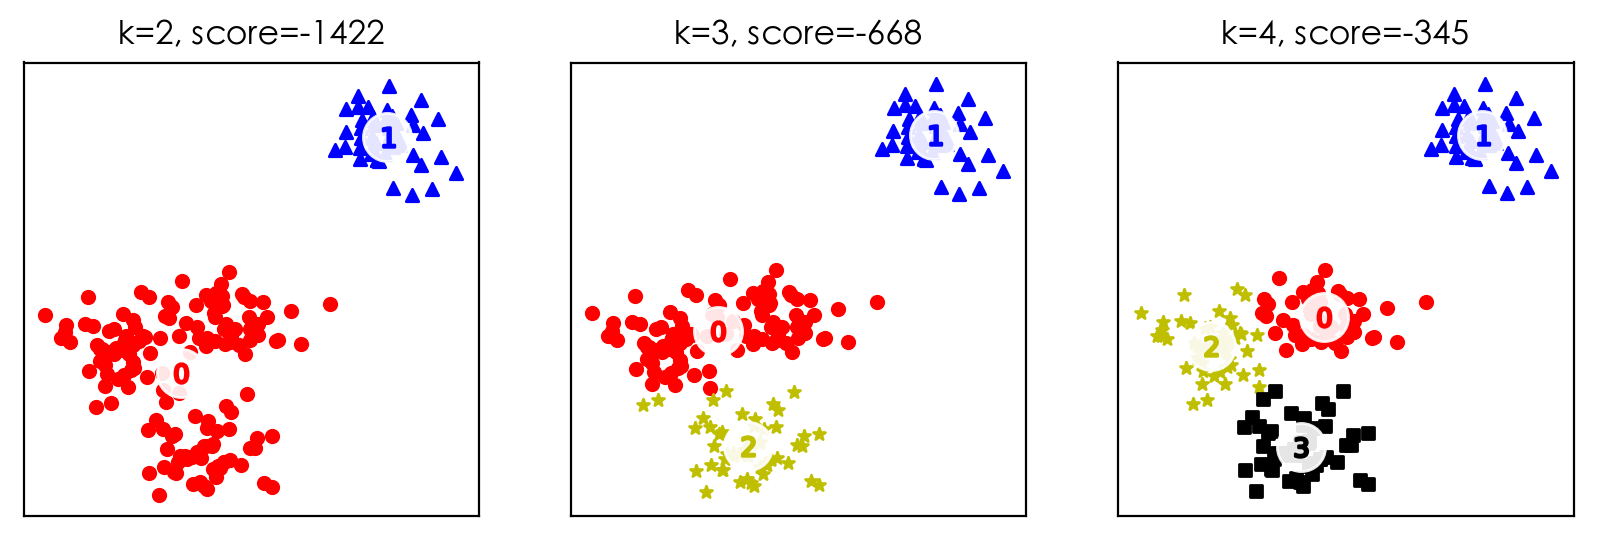

In [7]:
from sklearn.cluster import KMeans

n_clusters = [2, 3, 4]

plt.figure(figsize=(10, 3), dpi=100)
for i, c in enumerate(n_clusters):
    plt.subplot(1, 3, i + 1)
    fit_plot_kmean_model(c, X)